<a href="https://colab.research.google.com/github/ShreyanshGoindi/Customer-Personality-Analytics-Segmentation-System/blob/main/Final_Project_UnstructuredData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Project-UnstructuredData/Customer_Personality_Segmentation.csv", sep="\t")

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [ ]:
print("Dataset shape:", data.shape)
print(f"Number of columns: {data.shape[1]}")
print(f"Number of rows: {data.shape[0]}")

print("\nData types:")
print(data.dtypes)

print("\nColumn names:")
for i, col in enumerate(data.columns.tolist(), 1):
  print(f"{i:2d}. {col}")

Dataset shape: (2240, 29)
Number of columns: 29
Number of rows: 2240

Data types:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Colu

##### **Observations:** The dataset contains mixed data types including integers, floats, and objects (strings). There are numerical features for spending amounts, demographic info, and categorical features like Education and Marital_Status.

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [ ]:
print("Statistical Summary:")

print(data.describe())

print("\nAverage Household Income:")
print(f"${data['Income'].mean():,.2f}")

Statistical Summary:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.

##### **Observations:** The average household income is approximately **$52,247**. There's significant variation in income levels and spending patterns across customers.

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Checking any missing values in the data
print("Missing values per column:")
print(data.isnull().sum())
print("\nTotal missing values:", data.isnull().sum().sum())

Missing values per column:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Total missing values: 24


In [ ]:
# Handle missing values in the Income column
if data['Income'].isnull().sum() > 0:
  print("\nBefore handling missing values - Income nulls:", data['Income'].isnull().sum())
  data['Income'].fillna(data['Income'].median(), inplace=True)
  print("After handling missing values - Income nulls:", data['Income'].isnull().sum())
else:
  print("\n'Income' column either not found or has no missing values.")


Before handling missing values - Income nulls: 24
After handling missing values - Income nulls: 0


##### **Observations:** The Income column has 24 missing values which I've filled with the median value.

The Income column contains numerical data that is likely to be skewed due to outliers. In such cases, the median is a better measure of central tendency than the mean, as it is not affected by extreme values.

Therefore, I filled the missing values in the Income column with the median to maintain data consistency without being distorted by outliers.

#### **Question 4**: Are there any duplicates in the data?

In [ ]:
print("Number of duplicate rows:", data.duplicated().sum())
print("Dataset shape before removing duplicates:", data.shape)
data = data.drop_duplicates()
print("Dataset shape after removing duplicates:", data.shape)

Number of duplicate rows: 0
Dataset shape before removing duplicates: (2240, 29)
Dataset shape after removing duplicates: (2240, 29)


##### **Observations:** There are no duplicate rows present. However, if they would've been present, the above code would remove them to ensure data quality.

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

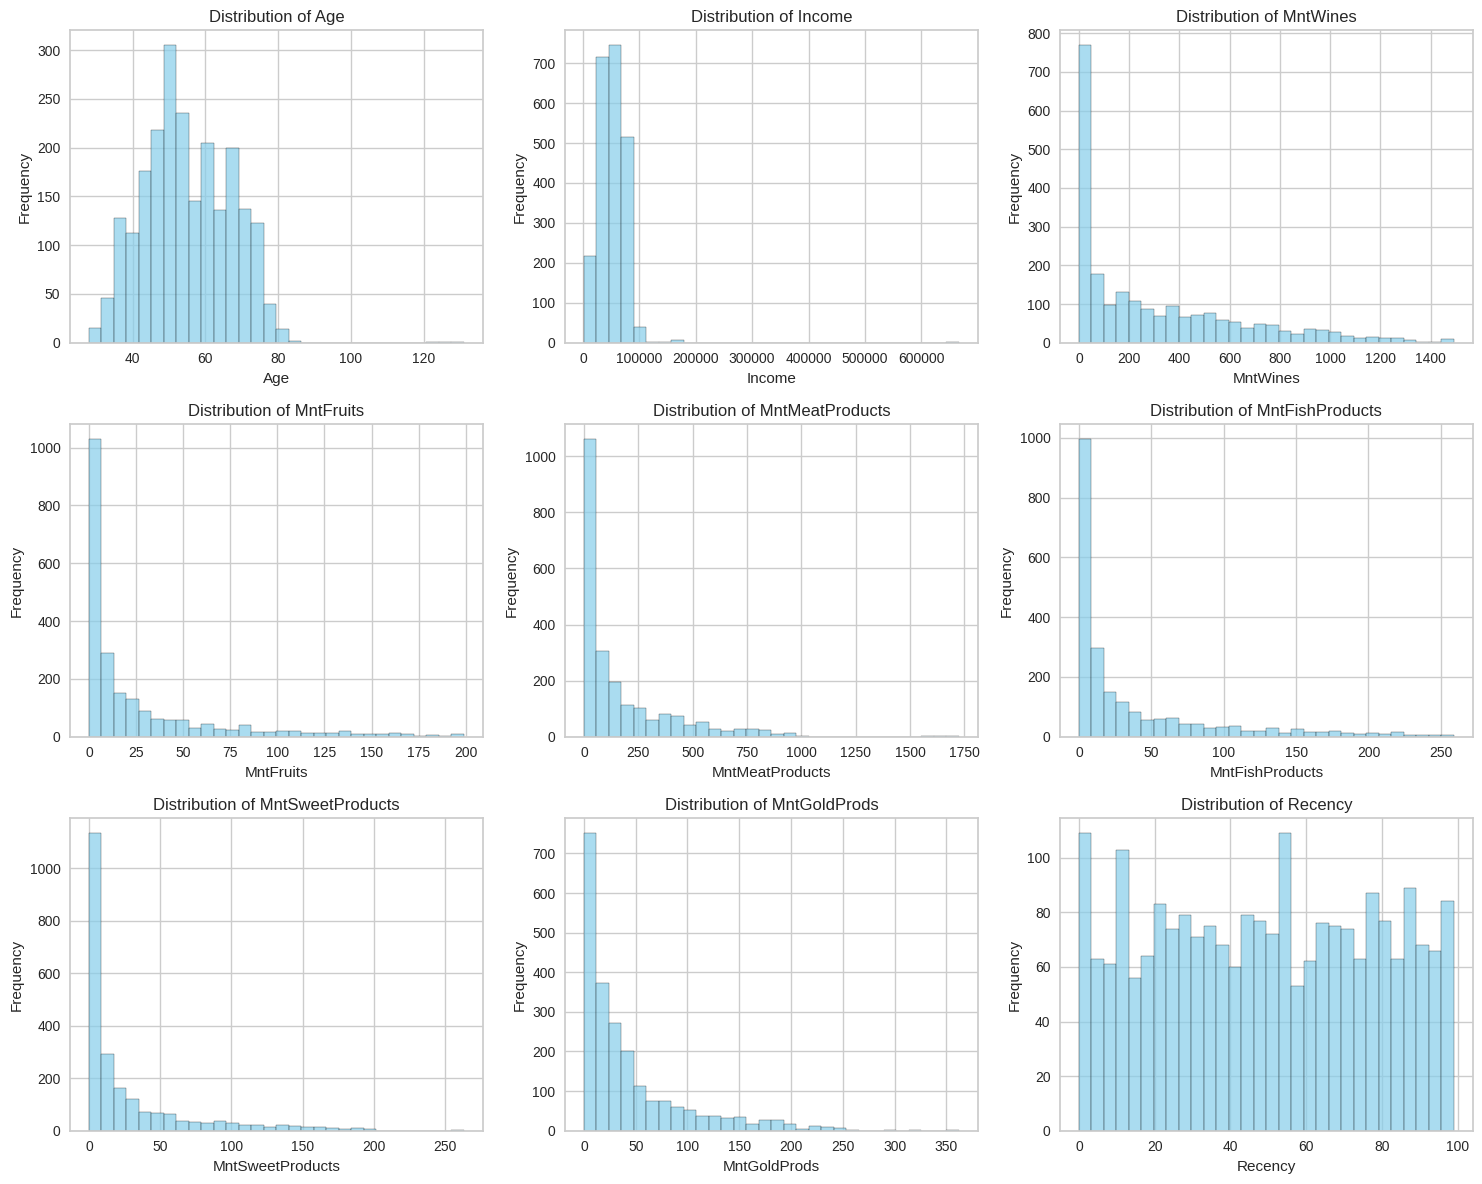

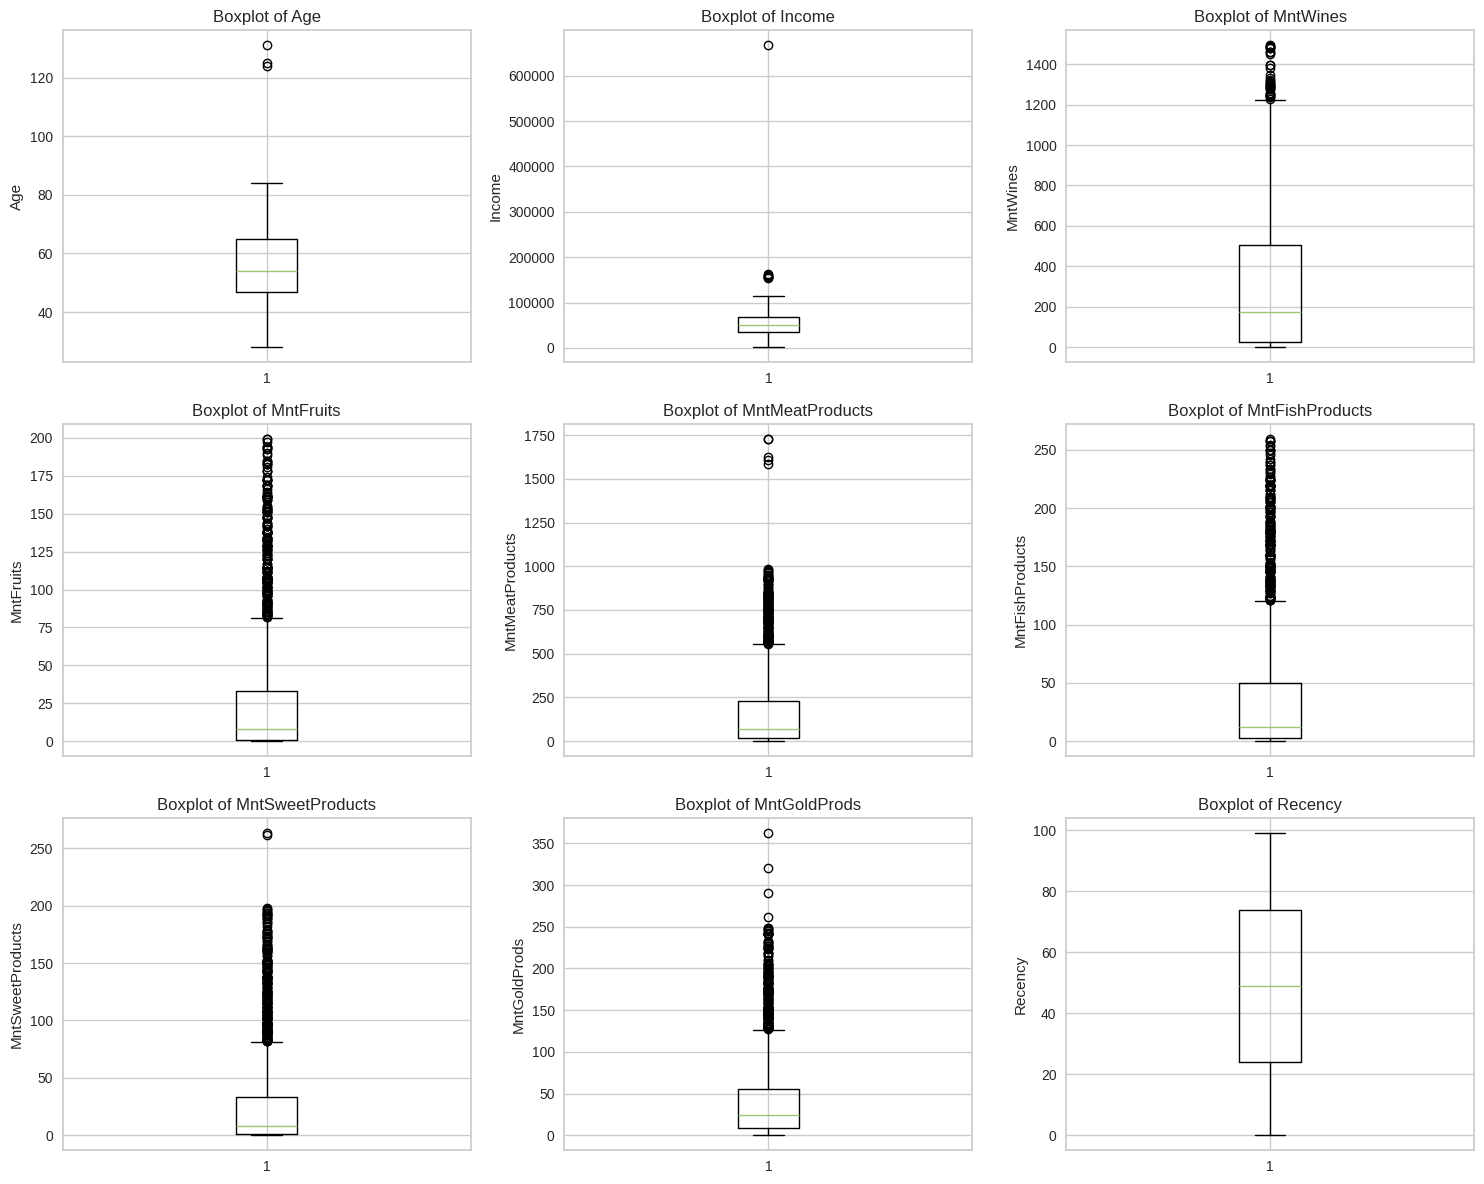

In [ ]:
# Create Age feature first
data['Age'] = 2024 - data['Year_Birth']

# Selecting numerical columns for analysis
numerical_cols = ['Age', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Recency']

# Histograms
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
  axes[i].hist(data[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
  axes[i].boxplot(data[col].dropna())
  axes[i].set_title(f'Boxplot of {col}')
  axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

##### **Observations:** Age distribution shows customers are mostly middle-aged (40-70 years). Income has some outliers. Wine spending shows the highest variation among product categories.

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

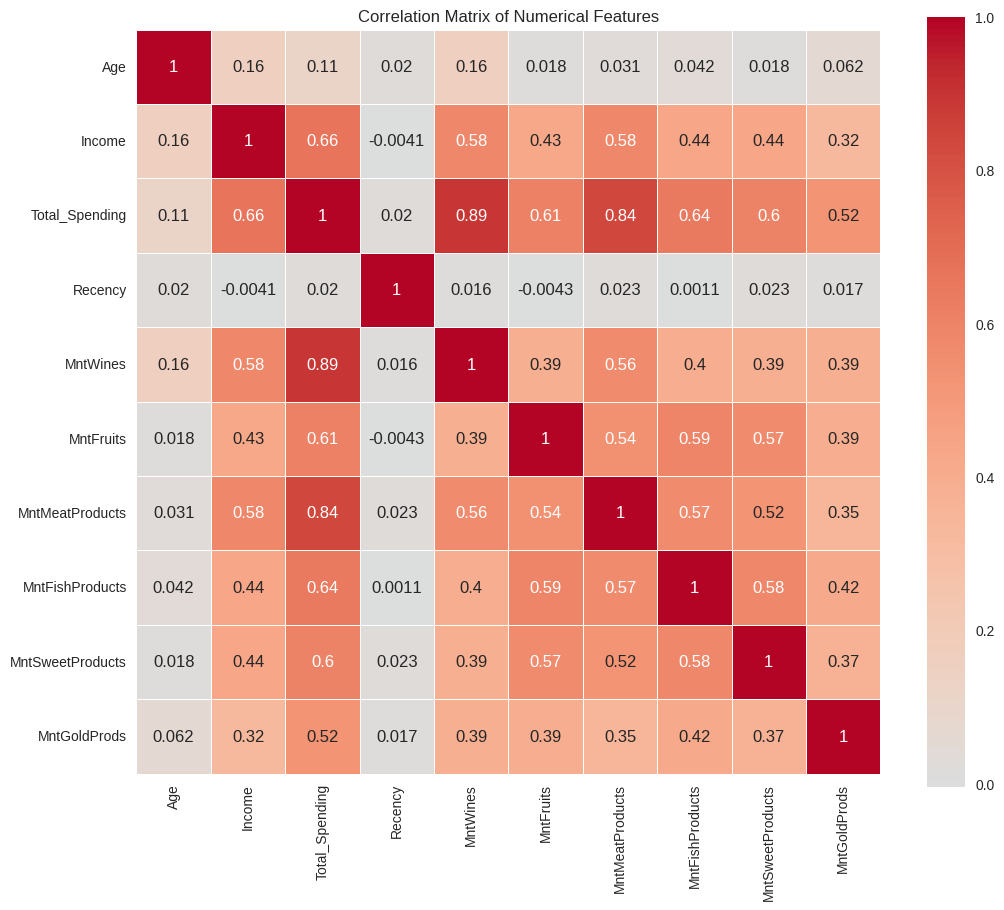

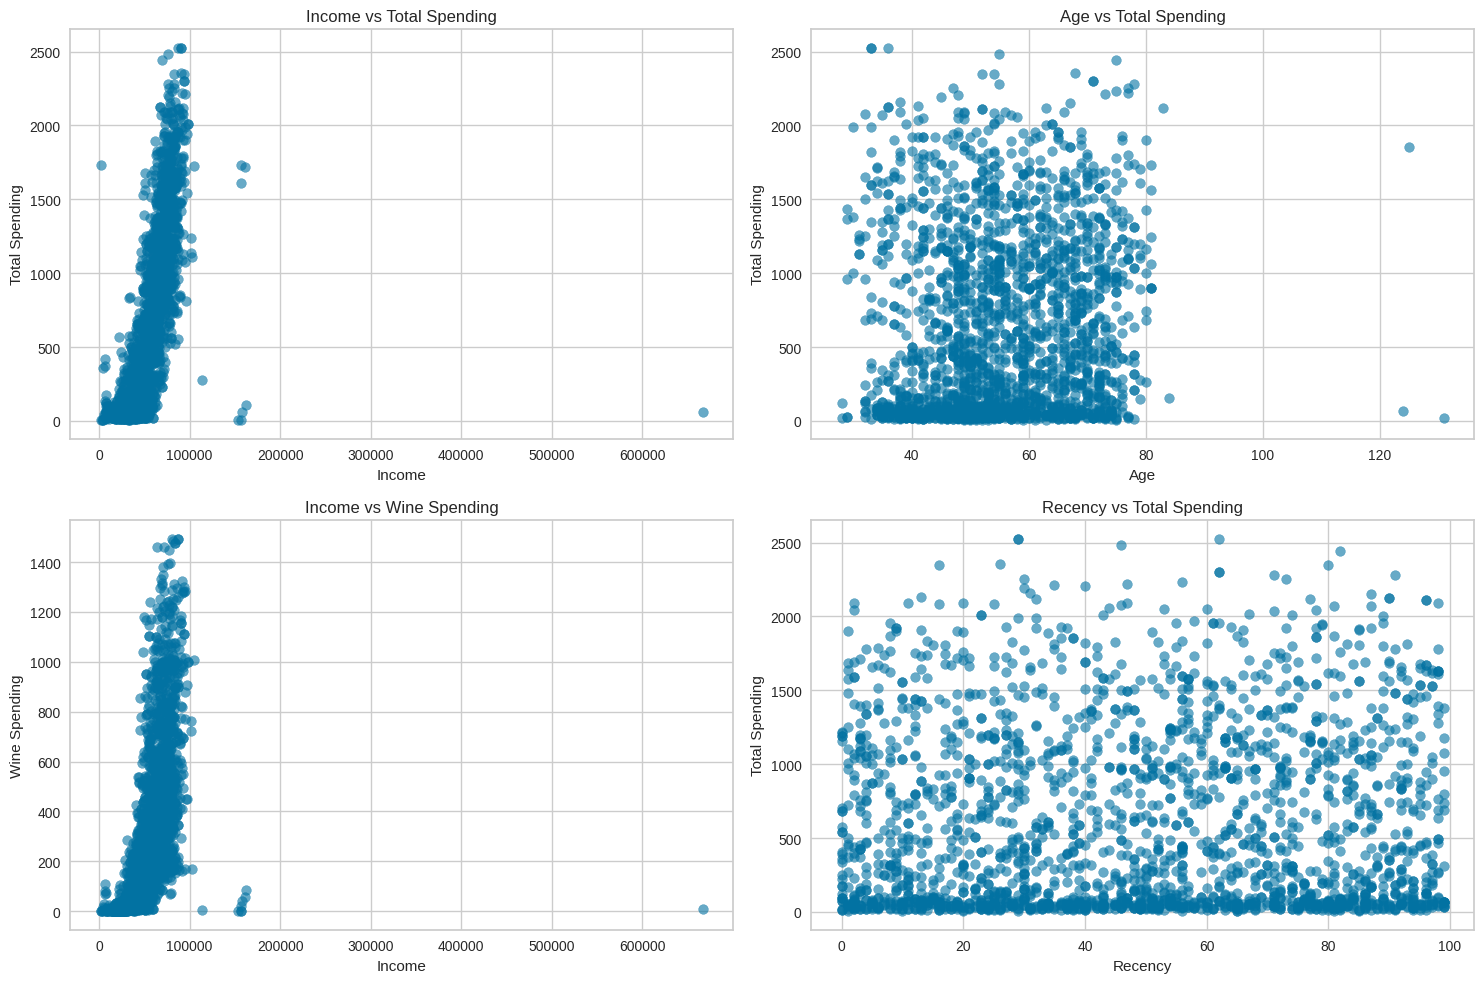

In [ ]:
# Creating total spending feature
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['Total_Spending'] = data[spending_cols].sum(axis=1)

# Correlation matrix
numerical_features = ['Age', 'Income', 'Total_Spending', 'Recency'] + spending_cols
correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0,0].scatter(data['Income'], data['Total_Spending'], alpha=0.6)
axes[0,0].set_xlabel('Income'); axes[0,0].set_ylabel('Total Spending')
axes[0,0].set_title('Income vs Total Spending')

axes[0,1].scatter(data['Age'], data['Total_Spending'], alpha=0.6)
axes[0,1].set_xlabel('Age'); axes[0,1].set_ylabel('Total Spending')
axes[0,1].set_title('Age vs Total Spending')

axes[1,0].scatter(data['Income'], data['MntWines'], alpha=0.6)
axes[1,0].set_xlabel('Income'); axes[1,0].set_ylabel('Wine Spending')
axes[1,0].set_title('Income vs Wine Spending')

axes[1,1].scatter(data['Recency'], data['Total_Spending'], alpha=0.6)
axes[1,1].set_xlabel('Recency'); axes[1,1].set_ylabel('Total Spending')
axes[1,1].set_title('Recency vs Total Spending')

plt.tight_layout()
plt.show()

##### **Observations:** Strong positive correlation between Income and Total Spending. Wine spending has the strongest correlation with total spending.

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

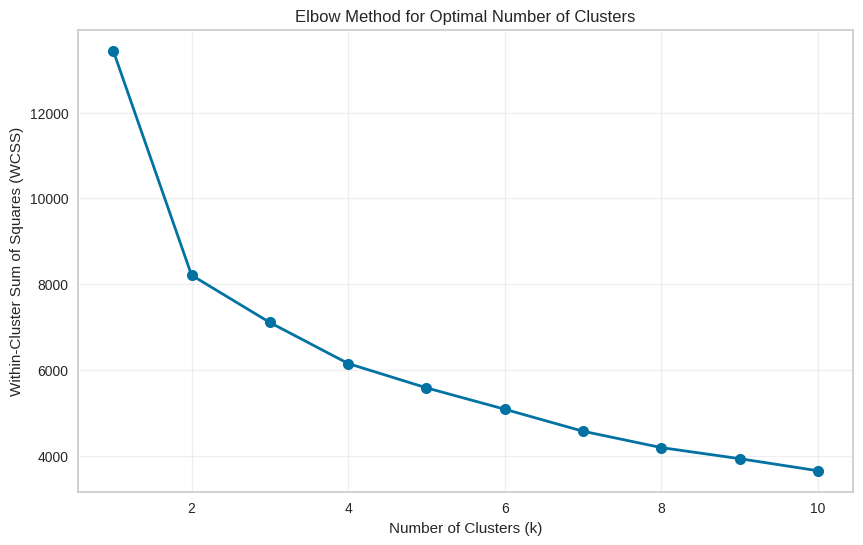

In [ ]:
# Preparing data for clustering
features_for_clustering = ['Age', 'Income', 'Total_Spending', 'Recency', 'MntWines', 'MntMeatProducts']
X = data[features_for_clustering].copy()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
wcss = []
k_range = range(1, 11)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True, alpha=0.3)
plt.show()

##### **Observations:** Based on the elbow curve, the optimal number of clusters appears to be around 3 or 4. The curve shows significant drops until k=3, with a more gradual decline afterwards. The elbow point suggests **k=3 or k=4** as reasonable choices. Will confirm this with silhouette analysis.

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

For k=2, average silhouette score = 0.3772
For k=3, average silhouette score = 0.2475
For k=4, average silhouette score = 0.2344
For k=5, average silhouette score = 0.2368
For k=6, average silhouette score = 0.2341
For k=7, average silhouette score = 0.2340
For k=8, average silhouette score = 0.2388
For k=9, average silhouette score = 0.2355
For k=10, average silhouette score = 0.2312


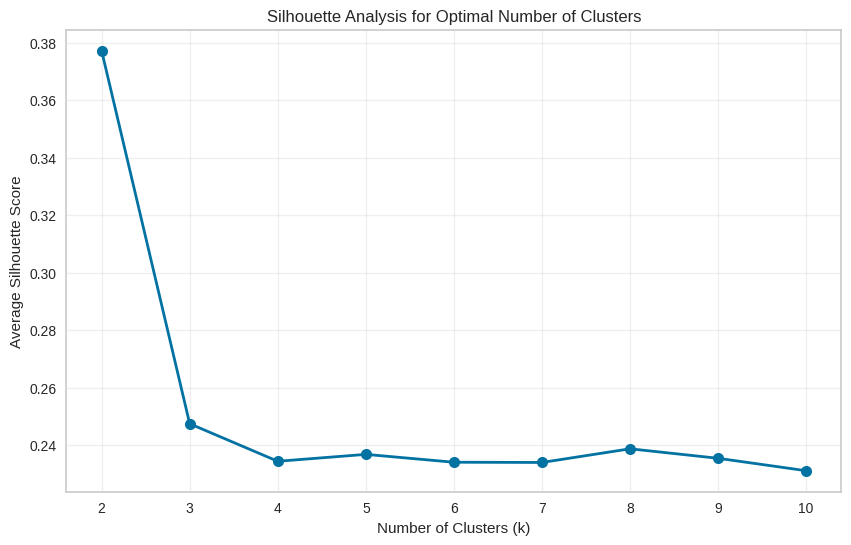


Optimal number of clusters: 2
Best silhouette score: 0.3772


In [ ]:
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  cluster_labels = kmeans.fit_predict(X_scaled)
  silhouette_avg = silhouette_score(X_scaled, cluster_labels)
  silhouette_scores.append(silhouette_avg)
  print(f"For k={k}, average silhouette score = {silhouette_avg:.4f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linewidth=2, markersize=8)
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True, alpha=0.3)
plt.show()

optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal number of clusters: {optimal_k}")
print(f"Best silhouette score: {max(silhouette_scores):.4f}")

##### **Observations:** The silhouette analysis clearly shows that **k=2** is optimal with the highest silhouette score of 0.3772. This differs from the elbow method which suggested k=3 or k=4. All other k values (3-10) have much lower and similar silhouette scores (~0.23-0.24). Based on the silhouette analysis, k=2 provides the best cluster separation and cohesion.

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [ ]:
import time

# Based on silhouette analysis, we choose k=2 (highest silhouette score)
optimal_k = 2

start_time = time.time()
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Cluster'] = kmeans_final.fit_predict(X_scaled)
end_time = time.time()

fitting_time = end_time - start_time
print(f"Time taken to fit the model: {fitting_time:.4f} seconds")
print(f"Number of clusters: {optimal_k}")
print("\nCluster distribution:")
print(data['Cluster'].value_counts().sort_index())

Time taken to fit the model: 0.0185 seconds
Number of clusters: 2

Cluster distribution:
Cluster
0    1406
1     834
Name: count, dtype: int64


##### **Observations:** The K-means model with k=2 clusters fitted very quickly, taking only **0.0185 seconds**. The final clustering resulted in two well-balanced segments: Cluster 0 with 1,406 customers (62.8%) and Cluster 1 with 834 customers (37.2%). The relatively balanced cluster sizes suggest both segments are substantial enough for meaningful business analysis and targeted marketing strategies.

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

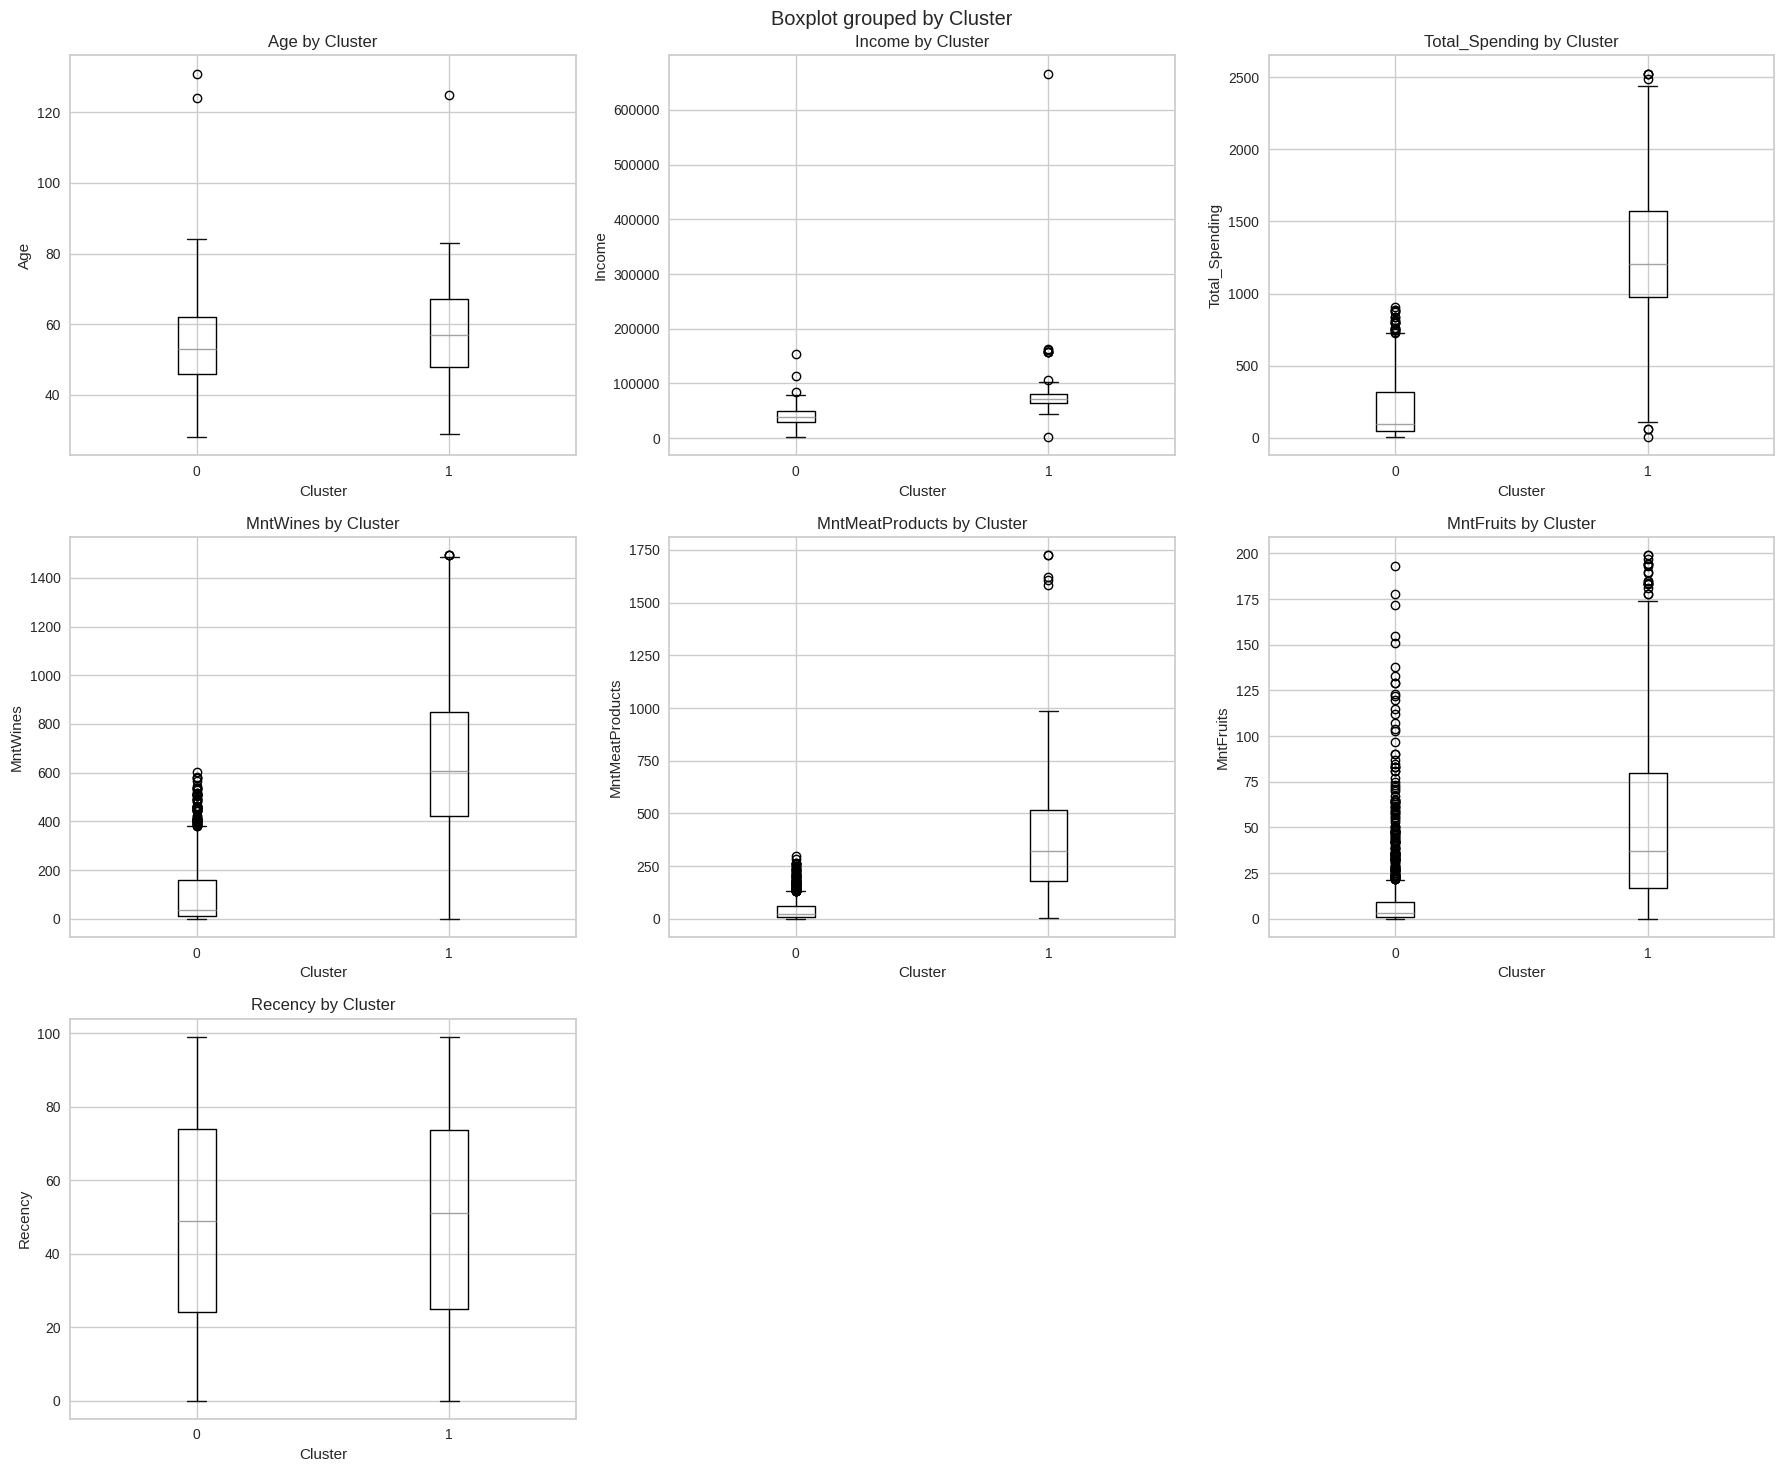

Cluster Profiling Summary:
           Age                 Income                    Total_Spending  \
          mean median    std     mean   median       std           mean   
Cluster                                                                   
0        54.01   53.0  11.48  39591.3  38974.5  14727.84         202.25   
1        57.19   57.0  12.55  73558.4  72108.0  24374.36        1286.12   

                        MntWines                MntMeatProducts         \
         median     std     mean median     std            mean median   
Cluster                                                                  
0          99.0  205.49   100.76   38.0  125.86           42.00   21.0   
1        1203.5  406.72   646.45  606.0  301.13          377.59  323.5   

                MntFruits               Recency                
            std      mean median    std    mean median    std  
Cluster                                                        
0         48.30      9.79    3.0  

In [ ]:
profiling_features = ['Age', 'Income', 'Total_Spending', 'MntWines', 'MntMeatProducts', 'MntFruits', 'Recency']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, feature in enumerate(profiling_features):
  if i < len(axes):
    data.boxplot(column=feature, by='Cluster', ax=axes[i])
    axes[i].set_title(f'{feature} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

for j in range(len(profiling_features), len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Cluster Profiling Summary:")
cluster_profiles = data.groupby('Cluster')[profiling_features].agg(['mean', 'median', 'std']).round(2)
print(cluster_profiles)

##### **Observations:** The cluster profiling reveals two distinct customer segments with clear differences:

**Cluster 0 (Budget-Conscious Customers) - 1,406 customers:**
* Lower average income (39,591) and age (54 years)
* Minimal spending across all categories (Total: 202)
* Low wine spending (101) and meat products (42)
* Higher recency (49 days) indicating less frequent purchases

**Cluster 1 (Premium Customers) - 834 customers:**
* Significantly higher income (73,558) and slightly older (57 years)
* High spending across all categories (Total: 1,286)
* Strong preference for wines (646) and meat products (378)
* Similar recency (50 days) but much higher engagement when they purchase

The two clusters show a clear value-based segmentation, with Cluster 1 representing high-value customers who spend 6x more despite representing only 37% of the customer base.

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

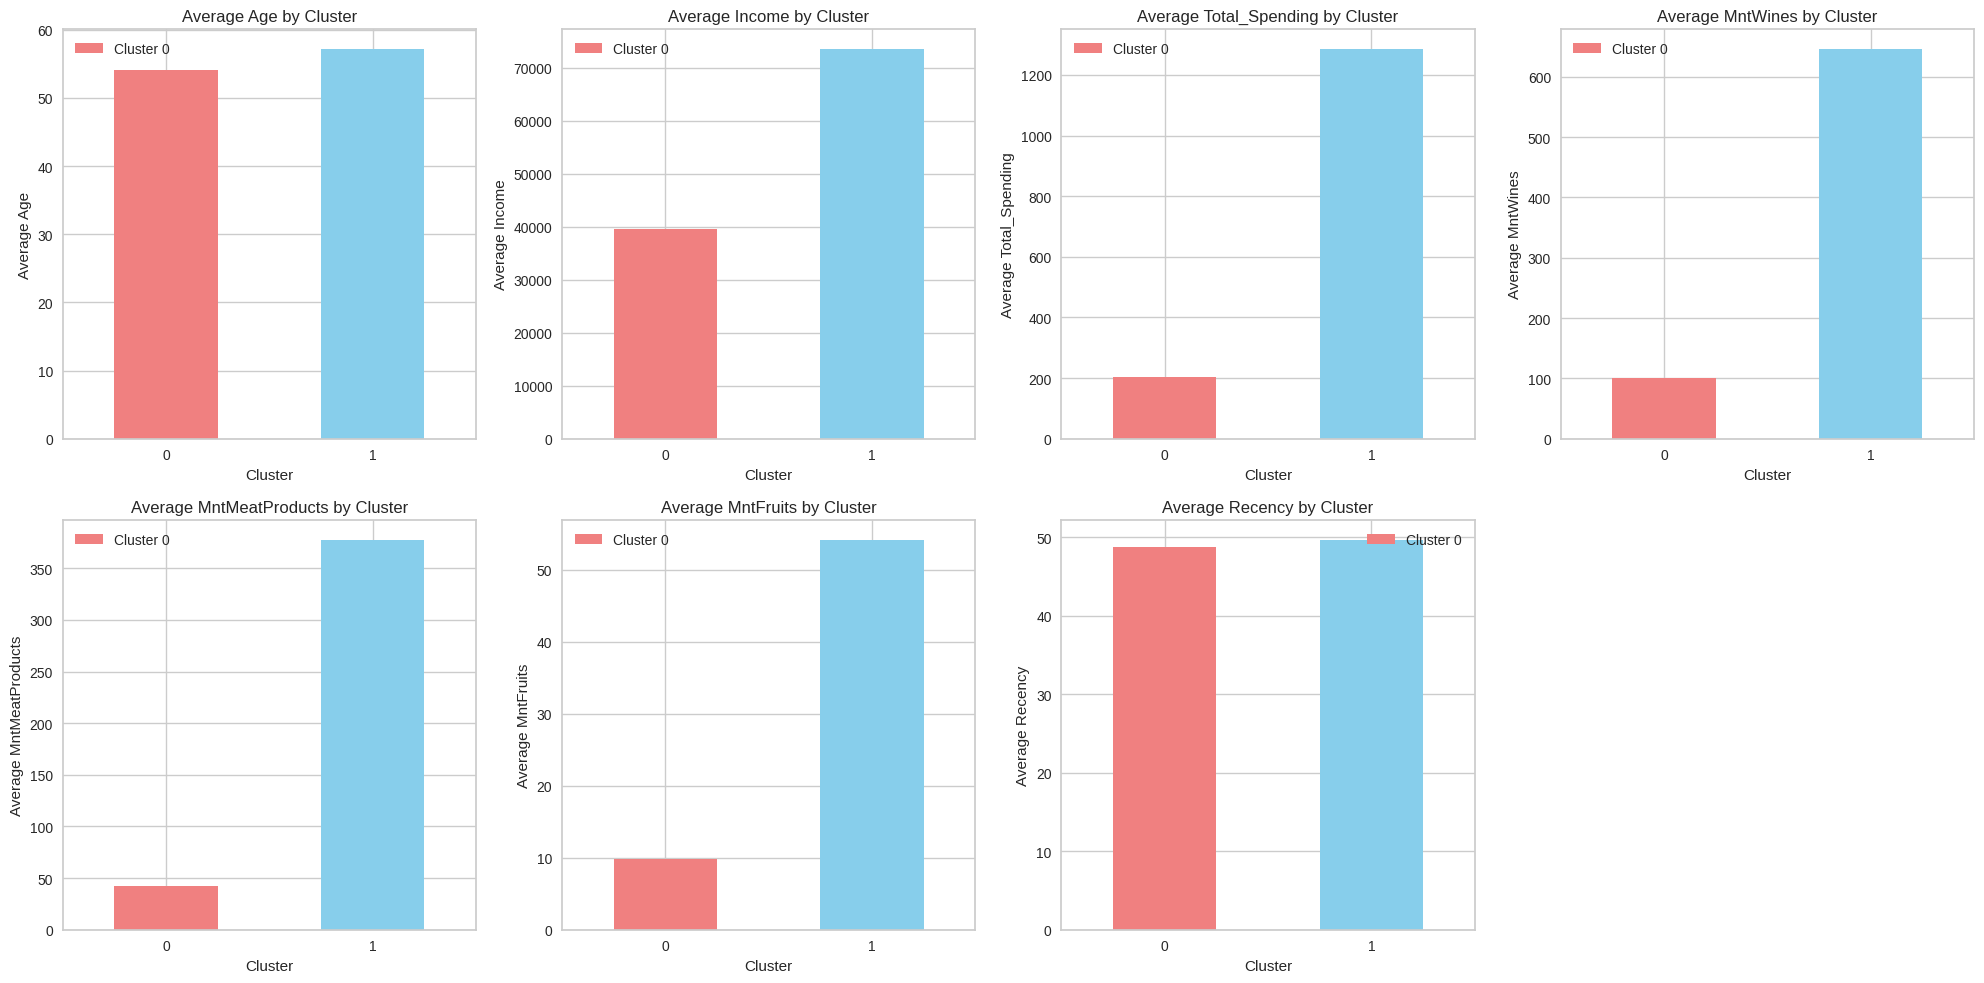

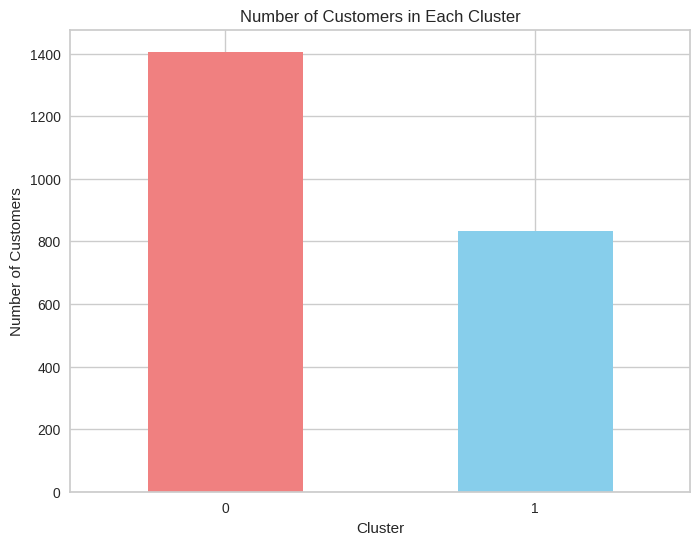

Cluster Sizes:
Cluster 0: 1406 customers (62.8%)
Cluster 1: 834 customers (37.2%)


In [ ]:
profiling_features = ['Age', 'Income', 'Total_Spending', 'MntWines', 'MntMeatProducts', 'MntFruits', 'Recency']

# Calculating mean values for each cluster
cluster_means = data.groupby('Cluster')[profiling_features].mean()

# Create bar plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(profiling_features):
  if i < len(axes):
    cluster_means[feature].plot(kind='bar', ax=axes[i], color=['lightcoral', 'skyblue'])
    axes[i].set_title(f'Average {feature} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(f'Average {feature}')
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].legend(['Cluster 0', 'Cluster 1'])

# Remove empty subplot
fig.delaxes(axes[7])
plt.tight_layout()
plt.show()

# Cluster sizes
plt.figure(figsize=(8, 6))
cluster_sizes = data['Cluster'].value_counts().sort_index()
cluster_sizes.plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

print("Cluster Sizes:")
for cluster in sorted(data['Cluster'].unique()):
    size = (data['Cluster'] == cluster).sum()
    percentage = (size / len(data)) * 100
    print(f"Cluster {cluster}: {size} customers ({percentage:.1f}%)")

##### **Observations:** The bar plots demonstrate two distinct customer segments:

**Cluster 0 (Budget-Conscious Segment):**
* Represents 62.8% of customers (1,406 customers)
* Lower average income, age, and spending across all categories
* Minimal engagement with premium products like wines
* Higher recency indicating less frequent purchases

**Cluster 1 (Premium Segment):**
* Represents 37.2% of customers (834 customers)  
* Significantly higher income and spending levels
* Strong preference for wines and meat products
* More engaged customers with higher purchase frequency

The clear separation between clusters indicates successful segmentation with actionable business implications. The size distribution (63% vs 37%) provides two substantial segments for targeted marketing strategies.

## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

In [ ]:
# Business Recommendations

print("COMPREHENSIVE BUSINESS RECOMMENDATIONS")
print("=" * 60)

print("\nCLUSTER 0: Budget-Conscious Customers (1,406 customers - 62.8%)")
print("Profile:")
print("• Lower income segment (avg: 39,591)")
print("• Price-sensitive with minimal spending (avg total: 202)")
print("• Less frequent shoppers (higher recency)")
print("• Represents the majority of customer base")
print("\nMarketing Strategies:")
print("• Value-oriented promotions and discount campaigns")
print("• Bundle deals and bulk purchase incentives")
print("• Budget-friendly product lines and alternatives")
print("• Cost-effective communication channels (email, SMS)")
print("• Loyalty programs focused on savings and rewards")

print("\nCLUSTER 1: Premium Customers (834 customers - 37.2%)")
print("Profile:")
print("• High-income affluent segment (avg: 73,558)")
print("• High-value customers with substantial spending (avg total: 1,286)")
print("• Strong preference for wines and premium products")
print("• Drives majority of company revenue despite smaller size")
print("\nMarketing Strategies:")
print("• Premium product offerings and luxury lines")
print("• VIP customer service and personalized attention")
print("• Exclusive events and wine tastings")
print("• Early access to new and limited-edition products")
print("• High-tier loyalty programs with exclusive benefits")

print("\nIMPLEMENTATION ROADMAP:")
print("Immediate (1-3 months): Segment database, launch targeted campaigns")
print("Short-term (4-12 months): Dynamic pricing, two-tier loyalty program")
print("Long-term (Year 2+): Predictive models, AI-driven personalization")

print("\nKEY SUCCESS METRICS:")
print("• Customer Lifetime Value (CLV) by segment")
print("• Average Order Value (AOV) improvement")
print("• Campaign conversion rates by segment")
print("• Customer retention rates")


COMPREHENSIVE BUSINESS RECOMMENDATIONS

CLUSTER 0: Budget-Conscious Customers (1,406 customers - 62.8%)
Profile:
• Lower income segment (avg: 39,591)
• Price-sensitive with minimal spending (avg total: 202)
• Less frequent shoppers (higher recency)
• Represents the majority of customer base

Marketing Strategies:
• Value-oriented promotions and discount campaigns
• Bundle deals and bulk purchase incentives
• Budget-friendly product lines and alternatives
• Cost-effective communication channels (email, SMS)
• Loyalty programs focused on savings and rewards

CLUSTER 1: Premium Customers (834 customers - 37.2%)
Profile:
• High-income affluent segment (avg: 73,558)
• High-value customers with substantial spending (avg total: 1,286)
• Strong preference for wines and premium products
• Drives majority of company revenue despite smaller size

Marketing Strategies:
• Premium product offerings and luxury lines
• VIP customer service and personalized attention
• Exclusive events and wine tasting